In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from itertools import *
%matplotlib inline

# Make sure that caffe is on the python path:
caffe_root = '/home/hanjun/Workspace/C++/caffe/'  # this file is expected to be in {caffe_root}/examples
import sys
sys.path.insert(0, caffe_root + 'python')
import caffe

In [2]:
caffe.set_mode_cpu()
net = caffe.Net('bn_conv_markovnet_logreg.prototxt',
                'forplot_iter_400.caffemodel',
                caffe.TEST)

In [101]:
filters = net.params['conv2'][0].data
bias = net.params['conv2'][1].data
filters = filters.reshape(28, 8)
print bias

[ -1.87893545e-06  -1.33740764e-06   1.61447292e-06   8.51523851e-07
   4.89078593e-06   2.78411858e-06   6.45771115e-06   1.31222150e-05
   3.38666246e-06  -6.09046822e-07   2.47263415e-06  -5.03613705e-07
   1.88991805e-06   6.38615120e-07   1.10237590e-06   3.33879052e-06
   1.78160553e-06   9.74517752e-06   5.56043551e-06   6.42800478e-06
  -4.29477996e-06   6.13588963e-06   2.69649104e-06   6.69850942e-06
  -8.14487009e-07   4.58346267e-06   1.81144298e-06   3.87684577e-06]


In [96]:
dict = scipy.io.loadmat('/home/hanjun/data/dataset/MarkovNetFeature/sequence_data.mat')
truth = dict['feat']
perms = permutations(range(truth.shape[0]))
best_match = -10000
for p in perms:
    sim = 0
    for i in range(len(p)):
        sim += np.inner(truth[i, :], filters[p[i], :])
    if sim > best_match:
        best_match = sim
        best_p = p
weights = filters
for i in range(len(best_p)):
    weights[i, :] = filters[best_p[i], :]
print filters[6, :]
print filters[7, :]

[ 0.14756961  0.09651606  0.00981699  0.03655088 -0.0189698   0.16892022]
[ 0.14756961  0.09651606  0.00981699  0.03655088 -0.0189698   0.16892022]


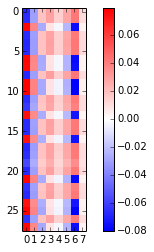

In [100]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(filters, interpolation='nearest', cmap=plt.cm.bwr)
plt.colorbar()
plt.show()